In [2]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plat
import palettable as pal
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

Populating the interactive namespace from numpy and matplotlib


In [6]:
!ls -lah

total 19216
drwxr-xr-x  19 johnsolk  staff   608B Jul 28 14:13 .
drwxr-xr-x  60 johnsolk  staff   1.9K Aug  4 09:59 ..
-rw-r--r--@  1 johnsolk  staff   6.0K Dec  8  2018 .DS_Store
drwxr-xr-x   3 johnsolk  staff    96B May 22  2018 .ipynb_checkpoints
-rw-r--r--   1 johnsolk  staff   447K Jul  1  2018 Figures_ICBF_poster_2018.ipynb
-rw-r--r--@  1 johnsolk  staff   1.4M Jun 28  2018 ICBF-2018-Poster-Johnson.pptx
-rw-r--r--@  1 johnsolk  staff   737K Jul  2  2018 ICBF-2018-Poster-Johnson_AW.pptx
-rw-r--r--@  1 johnsolk  staff   734K Jul  3  2018 ICBF-2018-Poster-Johnson_Draft2.pptx
-rw-r--r--@  1 johnsolk  staff   733K Jul  5  2018 ICBF-2018-Poster-Johnson_Draft3.pptx
-rw-r--r--@  1 johnsolk  staff   1.1M Jul  5  2018 ICBF-2018-Poster-Johnson_FINAL.pptx
-rw-r--r--@  1 johnsolk  staff   8.1K Jul  2  2018 PCA.pdf
-rw-r--r--@  1 johnsolk  staff    77K Jul  3  2018 PCA.png
-rw-r--r--   1 johnsolk  staff    42K Jun 26  2018 PCA_clade.png
-rw-r--r--@  1 johnsolk  staff    19K May 31  2018 busco_

In [3]:
BUSCO_met_file = "../evaluation/busco_scores_Dec2018_metazoa.csv"
BUSCO_euk_file = "../evaluation/busco_scores_Dec2018_eukaryota.csv"
BUSCO_actino_file = "../evaluation/busco_scores_Dec2018_actino.csv"
BUSCO_met = pd.read_csv(BUSCO_met_file)
BUSCO_euk = pd.read_csv(BUSCO_euk_file)
BUSCO_actino = pd.read_csv(BUSCO_actino_file)

In [5]:
BUSCO_euk.head()

,Unnamed: 0,Complete,Complete and single-copy,Complete and duplicated,Fragmented,Missing,Total,Complete_BUSCO_perc
0,F_chrysotus,299,81,218,3,1,303,98.679868
1,F_olivaceous,302,108,194,1,0,303,99.669967
2,F_zebrinus,301,109,192,2,0,303,99.339934
3,F_heteroclitusMDPP,301,60,241,2,0,303,99.339934
4,F_heteroclitusMDPL,300,72,228,3,0,303,99.009901


In [6]:
BUSCO_euk.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %']
BUSCO_met.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %']
BUSCO_actino.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %']
BUSCO_met['BUSCO Lineage Database'] = 'Metazoa'
BUSCO_euk['BUSCO Lineage Database'] = 'Eukaryota'
BUSCO_actino['BUSCO Lineage Database'] = 'Actinopterygii'

frames = [BUSCO_met,BUSCO_euk,BUSCO_actino]
BUSCO = pd.concat(frames)

In [7]:
BUSCO = BUSCO.sort_values(by=['species transcriptome'])
BUSCO.head()

,species transcriptome,Complete,Complete/Single-Copy,Complete/Duplicated,Fragmented,Missing,Total,Complete BUSCO %,BUSCO Lineage Database
14,A_xenica,3994,1486,2508,220,370,4584,87.129145,Actinopterygii
14,A_xenica,302,101,201,0,1,303,99.669967,Eukaryota
14,A_xenica,967,311,656,6,5,978,98.875256,Metazoa
9,F_catanatus,301,90,211,2,0,303,99.339934,Eukaryota
9,F_catanatus,4015,1583,2432,220,349,4584,87.587260,Actinopterygii


/Users/johnsolk/anaconda3/envs/dammit_dev/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/johnsolk/anaconda3/envs/dammit_dev/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


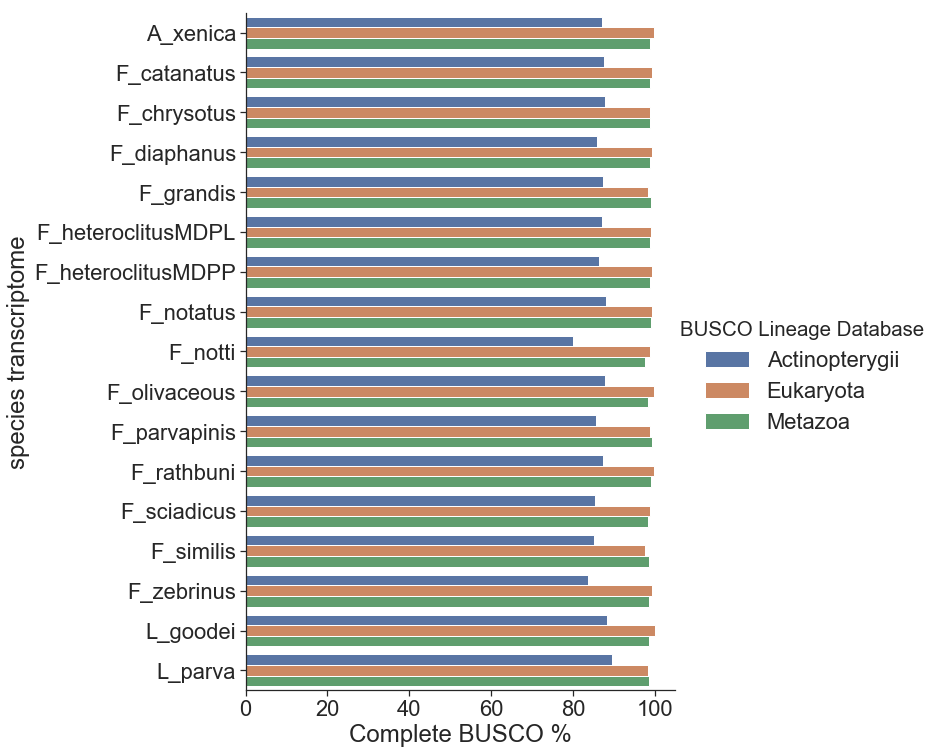

In [14]:
sns.set_style('ticks')
#sns.set(font_scale=2)
a = sns.factorplot(x="Complete BUSCO %", y="species transcriptome", hue="BUSCO Lineage Database", data=BUSCO, kind="bar", orient='h',size=11);
sns.despine()
sns.set_style("white")
a.savefig('busco_all.pdf')